In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_table("fruit_data_with_colors.txt")
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
df.shape

(59, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [5]:
df.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [6]:
df.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [7]:
df['fruit_name'].nunique()

4

In [8]:
df['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [9]:
counts=df['fruit_name'].value_counts()
counts

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [10]:
import matplotlib.pyplot as plt

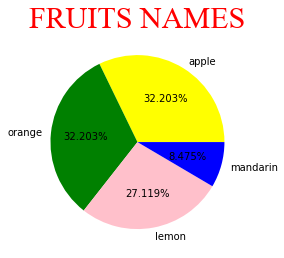

In [11]:
names=['apple', 'orange', 'lemon', 'mandarin']
c=['yellow','green','pink','blue']
plt.pie(counts,labels=names,autopct='%1.3f%%',colors=c,radius=1)
plt.title("FRUITS NAMES",fontdict={'name':'Times New Roman','size':30,'color':'red'})
plt.show()

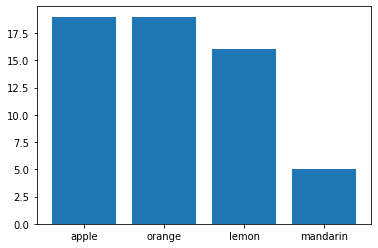

In [12]:
names=['apple', 'orange', 'lemon', 'mandarin']
plt.bar(names,counts)
plt.show()

In [13]:
df.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [14]:
X=df[['mass', 'width', 'height','color_score']]
y=df['fruit_name']
print(X.shape)
print(y.shape)

(59, 4)
(59,)


In [35]:
#Scaling
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_scale = scale.fit_transform(X)
print(X_scale)
print(type(X_scale ))
print(X_scale.shape)

[[ 0.52944179  1.59869024 -0.29139659 -2.79359541]
 [ 0.30946246  1.10485399 -0.66192242 -2.26868417]
 [ 0.23613601  0.36409961 -0.36550175 -2.13745636]
 [-1.41370901 -1.11740915 -2.21813091  0.48709984]
 [-1.45037224 -1.36432727 -2.29223608  0.35587203]
 [-1.52369868 -1.6112454  -2.51455158  0.09341641]
 [-1.52369868 -1.48778634 -2.51455158  0.61832765]
 [-1.59702513 -1.6112454  -2.73686708  0.61832765]
 [ 0.27279923 -0.00627758  0.07912925  2.06183356]
 [ 0.16280957  0.36409961 -0.51371209  1.66815013]
 [ 0.0528199  -0.25319571 -0.29139659  2.19306137]
 [ 0.16280957 -0.00627758 -0.06908109  2.06183356]
 [-0.16715944 -0.12973664 -0.43960692  1.53692232]
 [ 0.01615667  0.24064055  0.00502408 -0.82517826]
 [-0.20382266  0.61101774 -0.29139659 -0.95640607]
 [-0.13049622  0.7344768  -0.43960692 -0.95640607]
 [-0.13049622  0.61101774 -0.14318625 -1.21886169]
 [ 0.08948312  0.48755867 -0.06908109 -0.43149483]
 [-0.02050655  0.48755867 -0.43960692  0.88078327]
 [-0.02050655  0.36409961 -0.36

In [43]:
#Split into test and train
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1)

In [38]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(47, 4)
(47,)
(12, 4)
(12,)


In [39]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
print("LR:", accuracy_score(y_test,y_pred)*100)

LR: 66.66666666666666


In [41]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print(cm)


[[2 0 0 1]
 [0 4 0 0]
 [0 0 1 0]
 [3 0 0 1]]


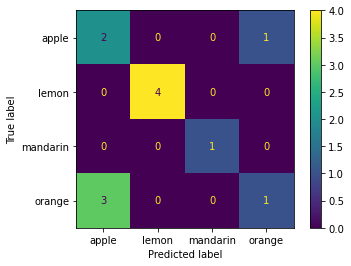

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(cm, display_labels=lr.classes_)
cmd.plot()


# KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)

y_pred= knn.predict(X_test)

print(accuracy_score(y_test,y_pred)%100)

0.5833333333333334


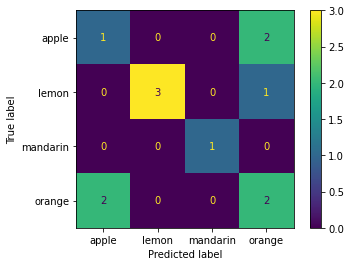

In [22]:
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=knn.classes_)

cmd.plot()

# NAIVE BAYES

In [23]:
from sklearn.naive_bayes import GaussianNB

nb= GaussianNB()
nb.fit(X_train,y_train)

y_pred=nb.predict(X_test)

print(accuracy_score(y_test,y_pred)%100)

0.6666666666666666


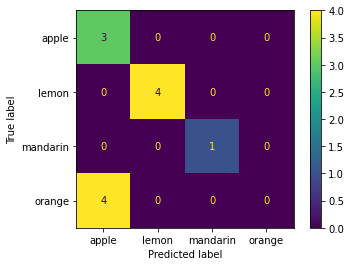

In [24]:
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=nb.classes_)

cmd.plot()

# SUPPORT VECTOR MACHINE

In [25]:
from sklearn.svm import SVC

sv = SVC(gamma='auto')
sv.fit(X_train,y_train)

y_pred=sv.predict(X_test)

print(accuracy_score(y_test,y_pred)%100)


0.75


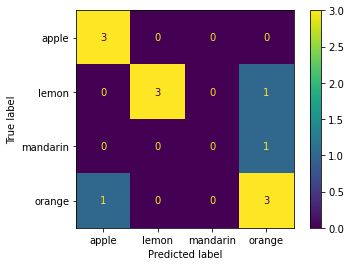

In [26]:

cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=sv.classes_)

cmd.plot()

# DecisionTree

In [27]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

y_pred=dtree.predict(X_test)

print(accuracy_score(y_test,y_pred)%100)

1.0


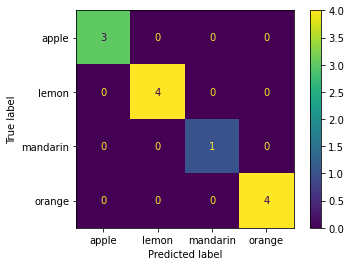

In [28]:
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=dtree.classes_)

cmd.plot()

# RandomForest

In [29]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

print(accuracy_score(y_test,y_pred))

1.0


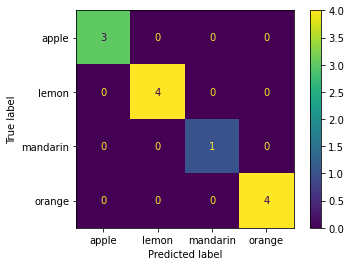

In [30]:
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=rfc.classes_)

cmd.plot()

In [31]:
import pickle

pickle.dump(dtree,open('fruit_data_with_colors.pkl','wb'))

In [32]:
data=[192,8.4,7.3,0.55]
#df

In [33]:
import warnings
warnings.filterwarnings('ignore')
model=pickle.load(open('fruit_data_with_colors.pkl','rb'))
import numpy as np
arr=np.array(data).reshape(1,-1)

result=model.predict(arr)
print(result[0])

apple
